In [1]:

import numpy as np
from scipy.signal import resample

# Load the data
#avg_entries = np.load("../../../sca101/generators/new_entries.npy")
#subset_traces = np.load("../../../sca101/generators/averaged_traces1000-0.890.npy")#avg_entries = np.load("destination/folder/var_0/inputs.npy")
#subset_traces = np.load("destination/folder/var_0/traces.npy")
avg_entries = np.load("avg_entries.npy")
subset_traces = np.load("avg_traces.npy")
# Select 50 inputs and their corresponding traces without limiting the number of points
selected_avg_entries = avg_entries[:300]
selected_subset_traces = subset_traces[:300]

# Resample the traces to 5000 points
resampled_subset_traces = resample(selected_subset_traces, 5000, axis=1)

# Data cleaning: Remove NaN and extreme values

# Remove NaN values from selected_avg_entries
nan_indices = np.argwhere(np.isnan(selected_avg_entries))
cleaned_avg_entries = np.delete(selected_avg_entries, nan_indices, axis=0)

# Remove corresponding traces
cleaned_subset_traces = np.delete(resampled_subset_traces, nan_indices, axis=0)

#np.save("cleaned_avg_entries300.npy", cleaned_avg_entries)

#np.save("cleaned_avg_traces300.npy", cleaned_subset_traces)

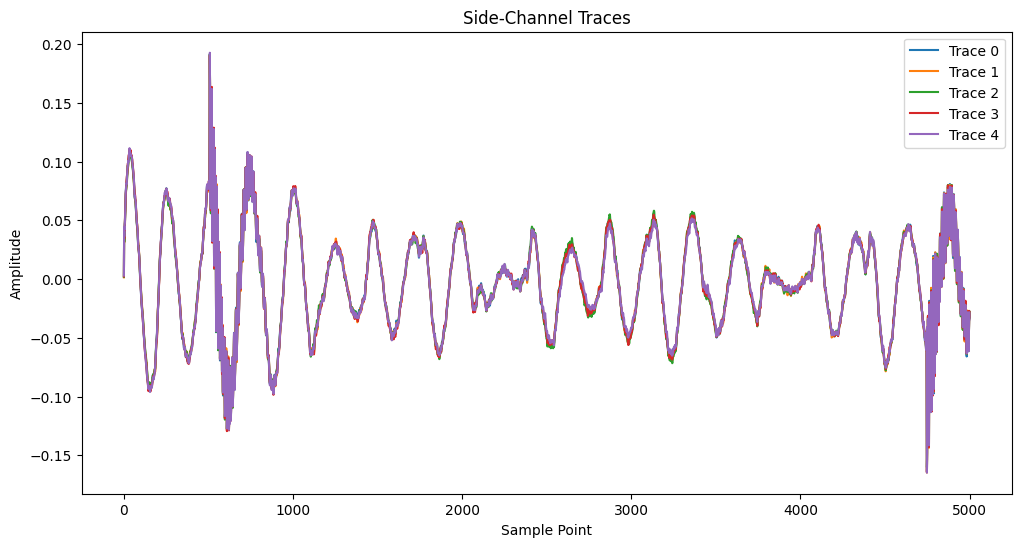

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import struct

traces = cleaned_subset_traces
inputs = cleaned_avg_entries

    
# Visualize some traces
plt.figure(figsize=(12, 6))
for i in range(5):  # Adjust the range as needed
    plt.plot(traces[i], label=f'Trace {i}')
plt.title('Side-Channel Traces')
plt.xlabel('Sample Point')
plt.ylabel('Amplitude')
plt.legend()
plt.show()






In [3]:
# Define hypothetical weight values
hypothetical_weights = np.arange(0.7, 0.9, 0.001)




In [4]:
def compute_max_correlation_batch(weights):
    print(f"Processing weights: {weights}")
    return [0] * len(weights)  # Simple operation for testing


In [5]:
def main():
    # Call the simplified function directly with a small subset
    result = compute_max_correlation_batch(hypothetical_weights[:10])

    print("Result:", result)

if __name__ == '__main__':
    main()


Processing weights: [0.7   0.701 0.702 0.703 0.704 0.705 0.706 0.707 0.708 0.709]
Result: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
import cProfile

def main():
    # Profile a single call to the original function
    profiler = cProfile.Profile()
    profiler.enable()
    result = compute_max_correlation_batch([hypothetical_weights[0]])
    profiler.disable()
    profiler.print_stats(sort='time')

    print("Result:", result)

if __name__ == '__main__':
    main()


Processing weights: [0.7]
         28 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 socket.py:613(send)
        2    0.000    0.000    0.000    0.000 iostream.py:535(write)
        1    0.000    0.000    0.000    0.000 2100838646.py:1(compute_max_correlation_batch)
        1    0.000    0.000    0.000    0.000 iostream.py:203(schedule)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.print}
        2    0.000    0.000    0.000    0.000 iostream.py:444(_is_master_process)
        1    0.000    0.000    0.000    0.000 threading.py:1169(is_alive)
        2    0.000    0.000    0.000    0.000 iostream.py:465(_schedule_flush)
        1    0.000    0.000    0.000    0.000 threading.py:1102(_wait_for_tstate_lock)
        1    0.000    0.000    0.000    0.000 iostream.py:90(_event_pipe)
        2    0.000    0.000    0.000    0.000 {built

Computing Correlations:   0%|          | 0/201 [00:00<?, ?it/s]

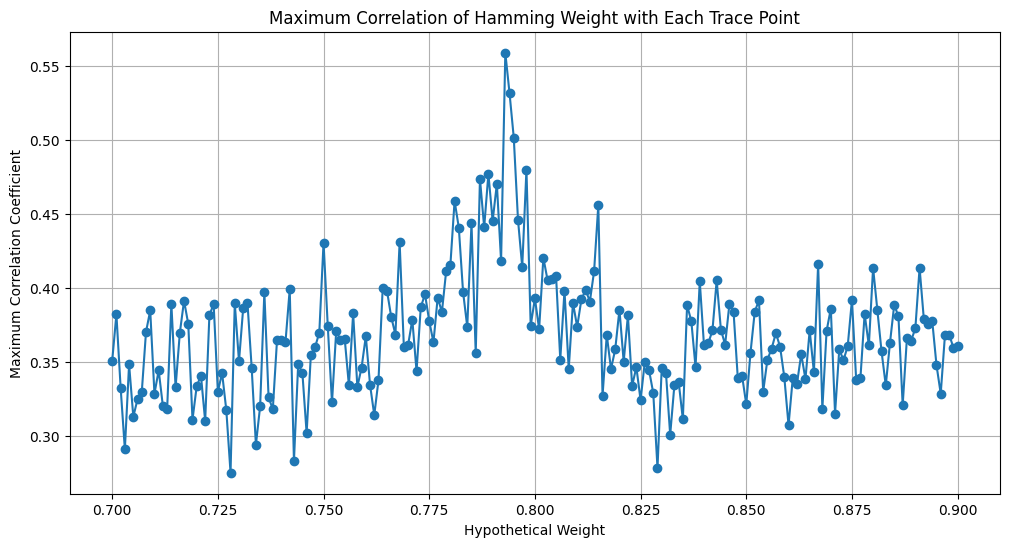

In [8]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from functools import lru_cache
from tqdm.notebook import tqdm

@lru_cache(maxsize=None)
def float_to_binary(num):
    """ Convert a floating point number to its binary representation in IEEE 754 format. """
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

@lru_cache(maxsize=None)
def hamming_weight(binary_str):
    """ Calculate the Hamming weight (number of '1's) in the binary string. """
    return binary_str.count('1')

# Number of sample points in each trace
num_sample_points = traces.shape[1]

def compute_max_correlation(weight):
    """ Compute the maximum correlation for a given weight. """
    hws = [hamming_weight(float_to_binary(float(input_value) * weight)) for input_value in inputs]
    correlations = [pearsonr(traces[:, sample_point], hws)[0] for sample_point in range(num_sample_points)]
    correlations = np.nan_to_num(correlations)
    return np.max(np.abs(correlations))

def main():
    num_sample_points = traces.shape[1]

    # Sequential computation with optimizations and progress bar
    max_correlations = []
    for weight in tqdm(hypothetical_weights, desc="Computing Correlations"):
        max_correlation = compute_max_correlation(weight)
        max_correlations.append(max_correlation)

    # Plotting the maximum correlations against hypothetical weights
    plt.figure(figsize=(12, 6))
    plt.plot(hypothetical_weights, max_correlations, marker='o')
    plt.title('Maximum Correlation of Hamming Weight with Each Trace Point')
    plt.xlabel('Hypothetical Weight')
    plt.ylabel('Maximum Correlation Coefficient')
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()


In [13]:
pip install cupy

     ---------------------------------------- 2.0/2.0 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached fastrlock-0.8.2-cp310-cp310-win_amd64.whl (29 kB)
  Running setup.py clean for cupy
Failed to build cupy
  Running setup.py install for cupy: started
  Running setup.py install for cupy: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [55 lines of output]
  Clearing directory: C:\Users\zqde8\AppData\Local\Temp\pip-install-n8ln_wwj\cupy_c8fdc8edaa324a86a40c99ff47a7a861\cupy\.data
  Looking for NVTX: C:\Program Files\NVIDIA Corporation\Nsight Systems *\target-windows-x64\nvtx
  NVTX could not be found
  
  -------- Configuring Module: cuda --------
  Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  **************************************************
  *** WARNING: Cannot check compute capability
  Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  **************************************************
  
  ************************************************************
  * CuPy Configuration Summary            

In [16]:
import cupy as cp  # Replacing numpy with cupy for GPU acceleration
import struct
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from functools import lru_cache
from tqdm.notebook import tqdm

@lru_cache(maxsize=None)
def float_to_binary(num):
    """ Convert a floating point number to its binary representation in IEEE 754 format. """
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

@lru_cache(maxsize=None)
def hamming_weight(binary_str):
    """ Calculate the Hamming weight (number of '1's) in the binary string. """
    return binary_str.count('1')

# Assuming traces and inputs are numpy arrays, convert them to cupy arrays
traces = cp.asarray(traces)
inputs = cp.asarray(inputs)

def compute_max_correlation(weight):
    """ Compute the maximum correlation for a given weight. """
    # This part might need optimization for GPU - currently, it's a potential bottleneck
    hws = cp.array([hamming_weight(float_to_binary(float(input_value) * weight)) for input_value in inputs])
    correlations = cp.array([pearsonr(traces[:, sample_point].get(), hws.get())[0] for sample_point in range(num_sample_points)])
    correlations = cp.nan_to_num(correlations)
    return cp.max(cp.abs(correlations))

def main():
    num_sample_points = traces.shape[1]

    # Sequential computation with optimizations and progress bar
    max_correlations = []
    for weight in tqdm(hypothetical_weights, desc="Computing Correlations"):
        max_correlation = compute_max_correlation(weight)
        max_correlations.append(max_correlation.get())  # Transfer result back to CPU

    # Plotting the maximum correlations against hypothetical weights
    plt.figure(figsize=(12, 6))
    plt.plot(hypothetical_weights, max_correlations, marker='o')
    plt.title('Maximum Correlation of Hamming Weight with Each Trace Point')
    plt.xlabel('Hypothetical Weight')
    plt.ylabel('Maximum Correlation Coefficient')
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()


ModuleNotFoundError: No module named 'cupy'

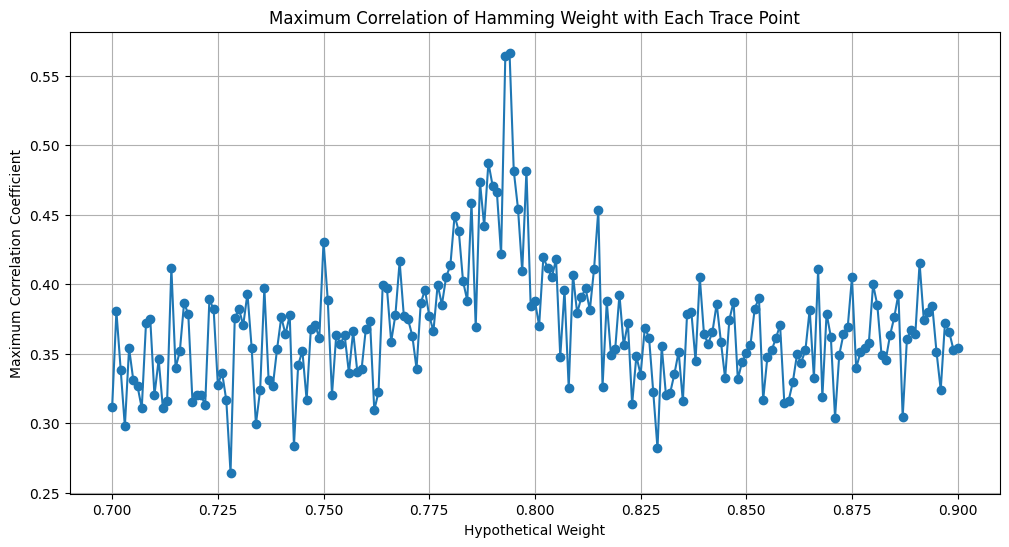

In [9]:
from tqdm.notebook import tqdm
# Analyze a trace
#selected_trace = traces[0]
#input_value = inputs[0]

def float_to_binary(num):
    """Convert a floating point number to its binary representation in IEEE 754 format."""
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

def hamming_weight(binary_str):
    """Calculate the Hamming weight (number of '1's) in the binary string."""
    return binary_str.count('1')

# Number of sample points in each trace
num_sample_points = traces.shape[1]

# Initialize an array to hold the maximum correlation for each hypothetical weight
max_correlations = np.zeros(len(hypothetical_weights))

# Loop over each hypothetical weight
for index, weight in enumerate(hypothetical_weights):
    # Compute the HW for each input multiplied by the hypothetical weight
    hws = [hamming_weight(float_to_binary(input_value * weight)) for input_value in inputs]

    # Compute correlation for each sample point and find the maximum correlation
    correlations = np.array([pearsonr(traces[:, sample_point], hws)[0] for sample_point in range(num_sample_points)])
    
    # Handle NaN values
    correlations = np.nan_to_num(correlations)

    # Find the maximum correlation for this hypothetical weight
    max_correlations[index] = np.max(np.abs(correlations))
    print(f"Progress: {index+1}/{len(hypothetical_weights)}", end='\r')
# Plotting the maximum correlations against hypothetical weights
plt.figure(figsize=(12, 6))
plt.plot(hypothetical_weights, max_correlations, marker='o')
plt.title('Maximum Correlation of Hamming Weight with Each Trace Point')
plt.xlabel('Hypothetical Weight')
plt.ylabel('Maximum Correlation Coefficient')
plt.grid()
plt.show()

In [14]:
!nvidia-smi

Fri Dec  1 06:21:20 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.17                 Driver Version: 546.17       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080      WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   41C    P8              24W / 320W |   1108MiB / 10240MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
import dask.array as da
from dask.diagnostics import ProgressBar
import numpy as np
import struct
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from functools import lru_cache

@lru_cache(maxsize=None)
def float_to_binary(num):
    """ Convert a floating point number to its binary representation in IEEE 754 format. """
    # Ensure the input is a standard Python float for caching
    num = float(num)  
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

@lru_cache(maxsize=None)
def hamming_weight(binary_str):
    """ Calculate the Hamming weight (number of '1's) in the binary string. """
    return binary_str.count('1')

def compute_max_correlation(weight, inputs, num_sample_points, traces):
    """ Compute the maximum correlation for a given weight. """
    hws = [hamming_weight(float_to_binary(float(input_value) * weight)) for input_value in inputs]
    correlations = [pearsonr(traces[:, sample_point], hws)[0] for sample_point in range(num_sample_points)]
    correlations = np.nan_to_num(correlations)
    return np.max(np.abs(correlations))

def main():
    num_sample_points = traces.shape[1]

    # Convert inputs and hypothetical_weights to Dask arrays
    dask_weights = da.from_array(hypothetical_weights, chunks=(len(hypothetical_weights) // 10))
    dask_inputs = da.from_array(inputs, chunks=inputs.shape)

    # Use Dask's map_blocks to apply the function in parallel
    result = dask_weights.map_blocks(compute_max_correlation, dask_inputs, num_sample_points, traces, dtype=float)

    # Compute the result with a progress bar
    with ProgressBar():
        max_correlations = result.compute()

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(hypothetical_weights, max_correlations, marker='o')
    plt.title('Maximum Correlation of Hamming Weight with Each Trace Point')
    plt.xlabel('Hypothetical Weight')
    plt.ylabel('Maximum Correlation Coefficient')
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()


[                                        ] | 0% Completed | 115.71 ms


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
# Define hypothetical weight values
hypothetical_weights = np.arange(0.788, 0.798, 0.0001)

In [ ]:
from tqdm.notebook import tqdm
# Analyze a trace
#selected_trace = traces[0]
#input_value = inputs[0]

def float_to_binary(num):
    """Convert a floating point number to its binary representation in IEEE 754 format."""
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

def hamming_weight(binary_str):
    """Calculate the Hamming weight (number of '1's) in the binary string."""
    return binary_str.count('1')

# Number of sample points in each trace
num_sample_points = traces.shape[1]

# Initialize an array to hold the maximum correlation for each hypothetical weight
max_correlations = np.zeros(len(hypothetical_weights))

# Loop over each hypothetical weight
for index, weight in enumerate(hypothetical_weights):
    # Compute the HW for each input multiplied by the hypothetical weight
    hws = [hamming_weight(float_to_binary(input_value * weight)) for input_value in inputs]

    # Compute correlation for each sample point and find the maximum correlation
    correlations = np.array([pearsonr(traces[:, sample_point], hws)[0] for sample_point in range(num_sample_points)])
    
    # Handle NaN values
    correlations = np.nan_to_num(correlations)

    # Find the maximum correlation for this hypothetical weight
    max_correlations[index] = np.max(np.abs(correlations))
    print(f"Progress: {index+1}/{len(hypothetical_weights)}", end='\r')
# Plotting the maximum correlations against hypothetical weights
plt.figure(figsize=(12, 6))
plt.plot(hypothetical_weights, max_correlations, marker='o')
plt.title('Maximum Correlation of Hamming Weight with Each Trace Point')
plt.xlabel('Hypothetical Weight')
plt.ylabel('Maximum Correlation Coefficient')
plt.grid()
plt.show()

In [ ]:
# Define hypothetical weight values
hypothetical_weights = np.arange(0.7930, 0.7936, 0.00001)

In [ ]:
from tqdm.notebook import tqdm
# Analyze a trace
#selected_trace = traces[0]
#input_value = inputs[0]

def float_to_binary(num):
    """Convert a floating point number to its binary representation in IEEE 754 format."""
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

def hamming_weight(binary_str):
    """Calculate the Hamming weight (number of '1's) in the binary string."""
    return binary_str.count('1')

# Number of sample points in each trace
num_sample_points = traces.shape[1]

# Initialize an array to hold the maximum correlation for each hypothetical weight
max_correlations = np.zeros(len(hypothetical_weights))

# Loop over each hypothetical weight
for index, weight in enumerate(hypothetical_weights):
    # Compute the HW for each input multiplied by the hypothetical weight
    hws = [hamming_weight(float_to_binary(input_value * weight)) for input_value in inputs]

    # Compute correlation for each sample point and find the maximum correlation
    correlations = np.array([pearsonr(traces[:, sample_point], hws)[0] for sample_point in range(num_sample_points)])
    
    # Handle NaN values
    correlations = np.nan_to_num(correlations)

    # Find the maximum correlation for this hypothetical weight
    max_correlations[index] = np.max(np.abs(correlations))
    print(f"Progress: {index+1}/{len(hypothetical_weights)}", end='\r')
# Plotting the maximum correlations against hypothetical weights
plt.figure(figsize=(12, 6))
plt.plot(hypothetical_weights, max_correlations, marker='o')
plt.title('Maximum Correlation of Hamming Weight with Each Trace Point')
plt.xlabel('Hypothetical Weight')
plt.ylabel('Maximum Correlation Coefficient')
plt.grid()
plt.show()